<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [20]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



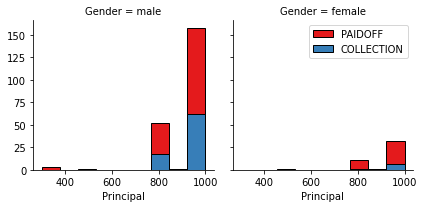

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

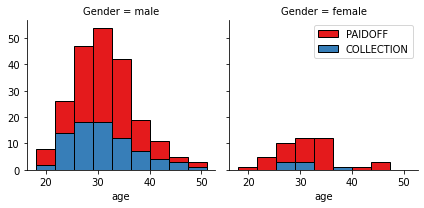

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

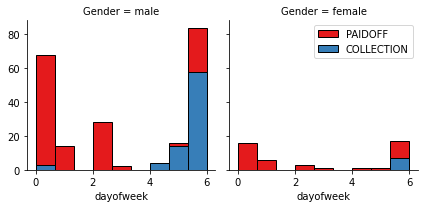

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
X = Feature

What are our lables?

In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)


In [42]:
print(X.shape)
print(y.shape)

(346, 8)
(346,)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [22]:
from sklearn.model_selection import train_test_split

# Fist of all, we need to split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Size of the test collection: ', X_test.shape)
print('Size of the training collection: ', X_train.shape)

Size of the test collection:  (70, 8)
Size of the training collection:  (276, 8)


In [23]:
# GridSearch for knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
n_neighbors =5
# type distance (p = 1 - manhattan_distance, p = 2 - euclidean_distance, )
# automatic selection of the algorithm type
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

# setting a list of parameters
# setting the number of neighbors
k_range = list(range(1, 50))
param_grid = [
  {'n_neighbors': k_range, 'p': [1,2], 'leaf_size': [5, 10, 30, 50, 70]} ]
#param_grid = dict(n_neighbors=k_range)
# sett up model
knn = KNeighborsClassifier(n_neighbors, algorithm='auto', leaf_size=50, p=2)
#  setting the parameter search model
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid.fit( X_train, y_train)
# output the best result
print(grid.best_params_)
print('f1_macro: ',grid.best_score_)

{'leaf_size': 5, 'n_neighbors': 20, 'p': 1}
f1_macro:  0.6530687472146797


# GridSearchCV is a best way to learn best combination of parameters
# But we did not learn 'GridSearchCV' in that cource, So I did just interation of n_neighbors for Euclid distance

[0.77142857 0.61428571 0.77142857 0.65714286 0.77142857 0.72857143
 0.77142857 0.67142857 0.71428571 0.72857143 0.68571429 0.71428571
 0.7        0.7        0.7        0.67142857 0.68571429 0.67142857
 0.68571429 0.68571429 0.68571429 0.68571429 0.68571429 0.68571429
 0.68571429 0.68571429 0.68571429 0.67142857 0.68571429]


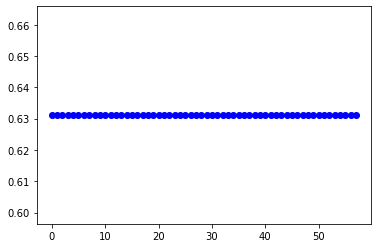

simulation is over


In [49]:
from sklearn.model_selection import cross_val_score
# organizing an empty scores array
cvkn_scores_train = []


neighbors = 30
mymean=np.zeros((neighbors-1))
mystd=np.zeros((neighbors-1))


for k in range(1, neighbors):
    kNN_model = KNeighborsClassifier(k, p=2).fit(X_train,y_train)
    knn_yhat = kNN_model.predict(X_test)
    mymean[k-1]=np.mean(knn_yhat==y_test);
    mystd[k-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

print(mymean)    
    
# build a chart F1
plt.plot(cv_scores_train, 'ro', alpha=0.1)
plt.plot(cv_scores_train, '-bo', linewidth=1)
plt.show()    
print('simulation is over')

[0.77142857 0.61428571 0.77142857 0.65714286 0.77142857 0.72857143
 0.77142857 0.67142857 0.71428571 0.72857143 0.68571429 0.71428571
 0.7        0.7       ]


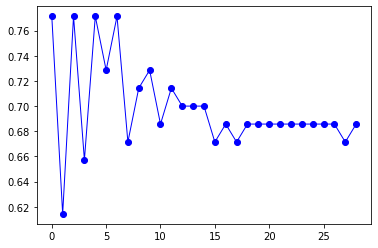

simulation is over


In [52]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

# build a chart F1
plt.plot(mymean, 'ro', alpha=0.1)
plt.plot(mymean, '-bo', linewidth=1)
plt.show()    
print('simulation is over')

# best results is 7 clusters

              precision    recall  f1-score   support

  COLLECTION       0.33      0.14      0.20        14
     PAIDOFF       0.81      0.93      0.87        56

    accuracy                           0.77        70
   macro avg       0.57      0.54      0.53        70
weighted avg       0.72      0.77      0.73        70

confusion matrix
[[ 2 12]
 [ 4 52]]


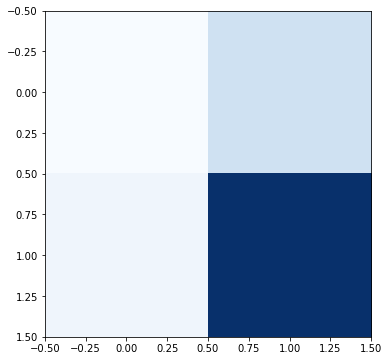

In [53]:
from sklearn import metrics
# train model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=7, p=2)
knn_best.fit(X_train, y_train)
# prediction on test data
predicted = knn_best.predict(X_test)
# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the numeric array will be rendered as a colored table.
cmap=plt.cm.Blues
ax.imshow(metrics.confusion_matrix(y_test, predicted), cmap=cmap)
fig.set_figwidth(6)    #  width 
fig.set_figheight(6)    #  height 
plt.show()

# Decision Tree

In [62]:
#from sklearn.tree import DecisionTreeClassifier
#param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 30)}
#clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_macro')

#clf.fit( X_train, y_train)
# output the best result
#print(clf.best_params_)
#print('f1_macro: ',clf.best_score_)

# that is just an examle how to do gridsearch for Decision Tree
# we did not learn gridsearch
# I just do it as it done on cource

              precision    recall  f1-score   support

  COLLECTION       0.27      0.29      0.28        14
     PAIDOFF       0.82      0.80      0.81        56

    accuracy                           0.70        70
   macro avg       0.54      0.54      0.54        70
weighted avg       0.71      0.70      0.70        70

confusion matrix
[[ 4 10]
 [11 45]]


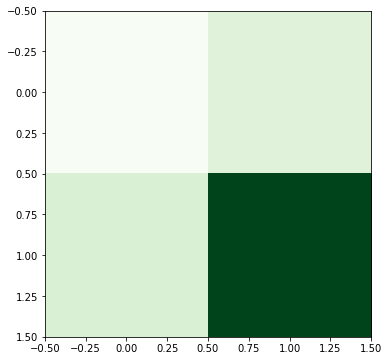

In [64]:
from sklearn import metrics
# train model with best parameters
my_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
my_Tree.fit(X_train, y_train)
# prediction on test data
predicted = my_Tree.predict(X_test)
# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the numeric array will be rendered as a colored table.
cmap=plt.cm.Greens
ax.imshow(metrics.confusion_matrix(y_test, predicted), cmap=cmap)
fig.set_figwidth(6)    #  width 
fig.set_figheight(6)    #  height 
plt.show()

# Support Vector Machine

In [48]:
# importing the model
#from sklearn import svm
#from sklearn import metrics
#from sklearn.svm import SVC

# we will use the data from the above example
#param_grid = [
#  {'C': [0.1, 1, 10], 'kernel': ['linear']},
#    {'C': [0.1, 1, 10], 'kernel': ['poly'], 'degree': [2,3,4,5,6]},
#  {'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]
# 
#svc = svm.SVC(gamma="scale")
#clf = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro')
#clf.fit(X_train, y_train)
# getting best result
#print(clf.best_params_)
#print('f1_macro: ',clf.best_score_)

# that is just an examle how to do gridsearch for Decision Tree
# we did not learn gridsearch
# I just do it as it done on cource

{'C': 1, 'kernel': 'linear'}
f1_macro:  0.644920028964805


              precision    recall  f1-score   support

  COLLECTION       0.17      0.14      0.15        14
     PAIDOFF       0.79      0.82      0.81        56

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.67      0.69      0.68        70

confusion matrix
[[ 2 12]
 [10 46]]


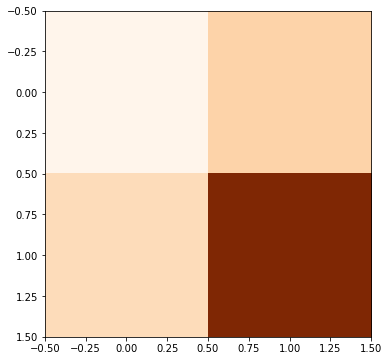

In [67]:
from sklearn.svm import SVC
#train model with best parameters
svm_best = SVC()
# training the model on a training dataset
svm_best.fit(X_train, y_train)

# getting prediction
predicted = svm_best.predict(X_test)
# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the numeric array will be rendered as a colored table.
cmap=plt.cm.Oranges
ax.imshow(metrics.confusion_matrix(y_test, predicted), cmap=cmap)
fig.set_figwidth(6)    #  width 
fig.set_figheight(6)    #  height 
plt.show()

# Logistic Regression

In [69]:
#from sklearn.linear_model import LogisticRegression
#Cs=list(np.power(10.0, np.arange(-10, 10)))

#param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100], 'penalty': ['l1', 'l2'],
#                'tol': [1e-10], 'solver': ['liblinear', 'newton-cg']}

#clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=100)
#gs = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', n_jobs=4, verbose=1, refit=True)

#gs.fit(X, y)
# getting best result
#print(gs.best_params_)
#print('f1_macro: ', gs.best_score_)


# that is just an examle how to do gridsearch for Decision Tree
# we did not learn gridsearch
# I just do it as it done on cource

              precision    recall  f1-score   support

  COLLECTION       0.23      0.21      0.22        14
     PAIDOFF       0.81      0.82      0.81        56

    accuracy                           0.70        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.69      0.70      0.70        70

confusion matrix
[[ 3 11]
 [10 46]]


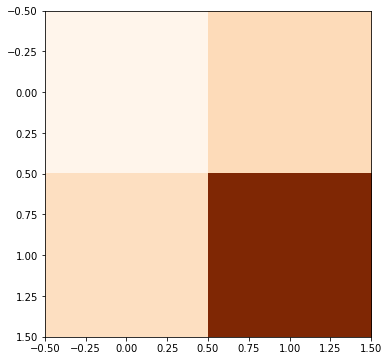

In [72]:
from sklearn.linear_model import LogisticRegression

#train model with best parameters
GS_best = LogisticRegression(penalty='l2', solver= 'liblinear', random_state=777, max_iter=10000, tol=1e-10)
# training the model on a training dataset
GS_best.fit(X_train, y_train)

# getting prediction
predicted = GS_best.predict(X_test)
# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the numeric array will be rendered as a colored table.
cmap=plt.cm.Oranges
ax.imshow(metrics.confusion_matrix(y_test, predicted), cmap=cmap)
fig.set_figwidth(6)    #  width 
fig.set_figheight(6)    #  height 
plt.show()

# Model Evaluation using Test set

In [73]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

### Load Test set for evaluation 

In [80]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [81]:
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [82]:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-10-07,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-09-22,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-08,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-10-08,29,Bechalor,0,6,1


In [83]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [84]:
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [85]:
Xt = Feature
print(Xt.shape)

(54, 8)


In [86]:
from sklearn import preprocessing
Xtt= preprocessing.StandardScaler().fit(Xt).transform(Xt)

In [87]:
yt = test_df['loan_status'].values
print(yt.shape)
print(Xtt.shape)

(54,)
(54, 8)


## jaccard_similarity_score does not work
## so I just use jaccard_score and transform prediction into 0 and 1

### KNN evaluation 

In [90]:
# KNN for test collection
yhat_knn = knn_best.predict(Xtt)
print('yhat_knn shape: ', yhat_knn.shape)

for i in range (len(yhat_knn)):
    if yhat_knn[i]=='PAIDOFF': yhat_knn[i]=1
    if yhat_knn[i]=='COLLECTION': yhat_knn[i]=0
    if yt[i]=='PAIDOFF': yt[i]=1
    if yt[i]=='COLLECTION': yt[i]=0

yt_list = list(yt)
yhat_knn_list = list(yhat_knn)

yhat_knn shape:  (54,)


In [91]:
from sklearn.metrics import jaccard_score
# jaccar distance
knn_jaccard = jaccard_score(yt_list, yhat_knn_list)
print('knn_jaccard: ', knn_jaccard)

knn_jaccard:  0.660377358490566


In [93]:
from sklearn.metrics import log_loss
knn_log_loss = log_loss(yt_list, yhat_knn_list)
print('knn_log_loss: ', knn_log_loss)

knn_log_loss:  11.51311796064787


In [96]:
from sklearn.metrics import f1_score
knn_f1_score = f1_score(yt_list, yhat_knn_list, average='macro')
print('F1_score: ', knn_f1_score)

F1_score:  0.4477272727272727


### Decision Tree evaluation 

In [97]:
yhat_DT = my_Tree.predict(Xtt)
print('yhat_DT: ', yhat_DT.shape)

for i in range (len(yhat_DT)):
    if yhat_DT[i]=='PAIDOFF': yhat_DT[i]=1
    if yhat_DT[i]=='COLLECTION': yhat_DT[i]=0

yhat_DT_list = list(yhat_DT)

yhat_DT:  (54,)


In [98]:
# jaccar distance
yhat_DT_jaccard = jaccard_score(yt_list, yhat_DT_list)
print('yhat_DT_jaccard: ', yhat_DT_jaccard)

yhat_DT_jaccard:  0.723404255319149


In [100]:
from sklearn.metrics import log_loss
yhat_DT_log_loss = log_loss(yt_list, yhat_DT_list)
print('yhat_DT_log_loss: ', yhat_DT_log_loss)

yhat_DT_log_loss:  8.314994265108338


In [101]:
from sklearn.metrics import f1_score
DT_f1_score = f1_score(yt_list, yhat_DT_list, average='macro')
print('DT_F1_score: ', DT_f1_score)

DT_F1_score:  0.6790123456790124


### SVM evaluation 

In [102]:
yhat_SVM = svm_best.predict(Xtt)
print('yhat_SVM: ', yhat_SVM.shape)

for i in range (len(yhat_DT)):
    if yhat_SVM[i]=='PAIDOFF': yhat_SVM[i]=1
    if yhat_SVM[i]=='COLLECTION': yhat_SVM[i]=0

yhat_SVM_list = list(yhat_SVM)

yhat_SVM:  (54,)


In [104]:
# jaccar distance
yhat_SVM_jaccard = jaccard_score(yt_list, yhat_SVM_list)
print('yhat_SVM_jaccard: ', yhat_SVM_jaccard)

yhat_SVM_jaccard:  0.74


In [105]:
from sklearn.metrics import log_loss
yhat_SVM_log_loss = log_loss(yt_list, yhat_SVM_list)
print('yhat_SVM_log_loss: ', yhat_SVM_log_loss)

yhat_SVM_log_loss:  8.315038687187792


In [106]:
from sklearn.metrics import f1_score
yhat_SVM_score = f1_score(yt_list, yhat_SVM_list, average='macro')
print('SVM_F1_score: ', yhat_SVM_score)

SVM_F1_score:  0.6157635467980296


### LogisticRegression evaluation 

In [107]:
yhat_GS = GS_best.predict(Xtt)
print('yhat_GS: ', yhat_GS.shape)

for i in range (len(yhat_GS)):
    if yhat_GS[i]=='PAIDOFF': yhat_GS[i]=1
    if yhat_GS[i]=='COLLECTION': yhat_GS[i]=0

yhat_GS_list = list(yhat_GS)

yhat_GS:  (54,)


In [109]:
# jaccar distance
yhat_GS_jaccard = jaccard_score(yt_list, yhat_GS_list)
print('yhat_GS_jaccard: ', yhat_GS_jaccard)

yhat_GS_jaccard:  0.76


In [112]:
from sklearn.metrics import log_loss
yhat_GS_log_loss = log_loss(yt_list, yhat_GS_list)
print('yhat_GS_log_loss: ', yhat_GS_log_loss)

yhat_GS_log_loss:  7.675431716911669


In [111]:
from sklearn.metrics import f1_score
yhat_GS_score = f1_score(yt_list, yhat_GS_list, average='macro')
print('GS_F1_score: ', yhat_GS_score)

GS_F1_score:  0.6318181818181818


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.72    | 0.45     | 11.51   |
| Decision Tree      | 0.72    | 0.68     | 8.31    |
| SVM                | 0.74    | 0.61     | 8.31    |
| LogisticRegression | 0.63    | 0.76     | 7.67    |